### PowerPlant Fuel Type & Capacity Prediction

In [239]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type.

In [240]:
df=pd.read_csv("https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv")
df

ParserError: Error tokenizing data. C error: Expected 1 fields in line 40, saw 10


In [274]:
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [275]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


We see the first 5 rows of the Global power plant dataset using the head method.

In [276]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We see the last 5 rows of the dataset using the tail method.

In [277]:
df.shape

(907, 27)

We see there are 907 rows and 27 columns in this dataset.

In [278]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

we see there are 27 columns in which 25 are features and 2 are the target variables.
1.	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification.
2.	`country_long` (text): longer form of the country designation
3.	`name` (text): name or title of the power plant, generally in Romanized form
4.	`gppd_idnr` (text): 10 or 12 character identifier for the power plant
5.	`capacity_mw` (number): electrical generating capacity in megawatts
6.	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
7.	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
8.	`primary_fuel` (text): energy source used in primary electricity generation or export
9.	`other_fuel1` (text): energy source used in electricity generation or export
10.	`other_fuel2` (text): energy source used in electricity generation or export
11.	`other_fuel3` (text): energy source used in electricity generation or export
12.	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
13.	`owner` (text): majority shareholder of the power plant, generally in Romanized form
14.	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
15.	`url` (text): web document corresponding to the `source` field
16.	`geolocation_source` (text): attribution for geolocation information
17.	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
18.	`year_of_capacity_data` (number): year the capacity information was reported
19.	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
20.	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
21.	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
22.	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
23.	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
24.	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
25.	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
26.	`generation_data_source` (text): attribution for the reported generation information
27.	`estimated_generation_gwh` (number): estimated electricity generation in gigawatt-hours for the year 2013


Target variables are 
1) Primary Fuel: Primary fuel is a categorical data so we need to build a classification model.

2) capacity_mw: Primary fuel is a continous data so we need to buil a regression model.




In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

We see there are 907 rows and 27 columns in which 15 are of float type and 12 are object type. we aee there are so many null values in the dataset and some features does not have any data which has all null values and need to remove this features. we need to convert the object data to numeric data using encoding techniques.

In [280]:
## dropping columns other_fuel2, other_fuel3, wepp_id, generation_gwh_2013,generation_gwh_2019,estimated_generation_gwh

df.drop(columns = ['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'], axis=1, inplace=True)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [281]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [282]:
for i in df:
    print(df[i].value_counts())
    print('\n')

IND    907
Name: country, dtype: int64


India    907
Name: country_long, dtype: int64


ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64


WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64


5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64


19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     

#### We see that country, country_long, generation_data_source, Year_of_capacity_data are having only single value for all the observations which is not helpful for predictions.

#### Then gppd_idnr, source and url is having all different values that is 907 different values for 907 observations there is no similarity so this is also not in use for predicting the targets

##### so we will drop "country","country_long","generation_data_source","Year_of_capacity_data" and "gppd_idnr" columns

In [283]:
df.drop(columns = ['country','country_long','generation_data_source','year_of_capacity_data','gppd_idnr'], axis=1, inplace=True)
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN


In [284]:
# from name,source, owner and url we cannot predict any data 
df.drop(columns = ['name','source','url', 'owner'], axis=1, inplace=True)
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.0,WRI,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,NaN,NaN,Industry About,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN


Now we have dropped all the unwanted columns. next we will go with treating the null values

In [285]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [286]:
## filling Null values

df['latitude'].fillna(df['latitude'].mean(), inplace=True)
df['longitude'].fillna(df['longitude'].mean(), inplace=True)
df['other_fuel1'].fillna(df['other_fuel1'].mode()[0], inplace=True)
df['commissioning_year'].fillna(df['commissioning_year'].mode()[0], inplace=True)
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean(), inplace=True)
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean(), inplace=True)
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean(), inplace=True)
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean(), inplace=True)
df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean(), inplace=True)

In [287]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

Now, we see there are no null values in the dataset and next we go with description of the dataset

In [288]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,2004.594267,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,15.734928,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1998.000000,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,2014.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,2015.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


we see 
1. The counts are equal in all the columns
2. The standard deviation is less than mean in some of the columns like Latitude, Longitude, Commissioning year and high in columns like Capacity_mw, generation_gwh of all the years which means the data is not normal.
3. The mean is greater than median which means there is right skewness in columns like capacity_mw, longitude.
4. The see that mean is less than median in the column like latitude and commissioning year which means left skewness.
5. The difference between the percentiles and max values are high which means there is some outliers in most of the columns.

In [289]:
# rename the attribute Primary_fuel as fuel_type
df.rename(columns={'primary_fuel':'Fuel_Type'},inplace=True)

In [290]:
categorical_col=[]
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
    else:
        numerical_col.append(i)
print('Categorical Columns are: ', categorical_col)
print('Numerical Columns are: ', numerical_col)

Categorical Columns are:  ['Fuel_Type', 'other_fuel1', 'geolocation_source']
Numerical Columns are:  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


Now, we will go with graphical analysis of the dataset.

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: Fuel_Type, dtype: int64


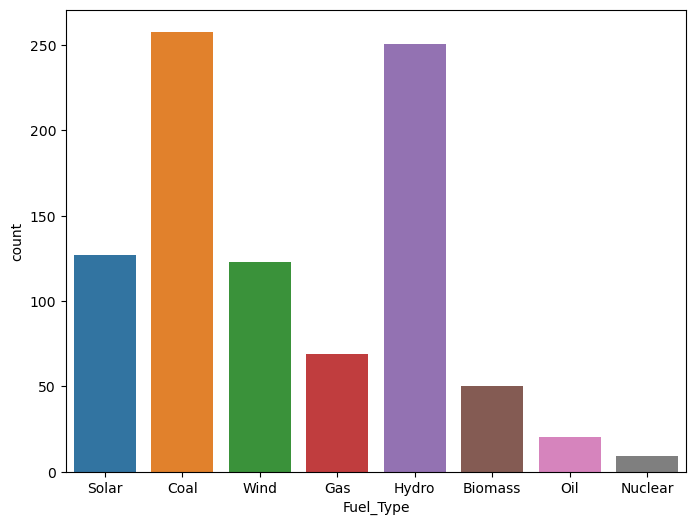

In [291]:

plt.figure(figsize=(8,6))
sns.countplot(df['Fuel_Type'])
print(df['Fuel_Type'].value_counts())
plt.show()

We see that coal and hydro are more used for electricity generation. Nuclear is used very less for electricity generation. we also observe that our datset is imbalanced. so we need to balance dataset.

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


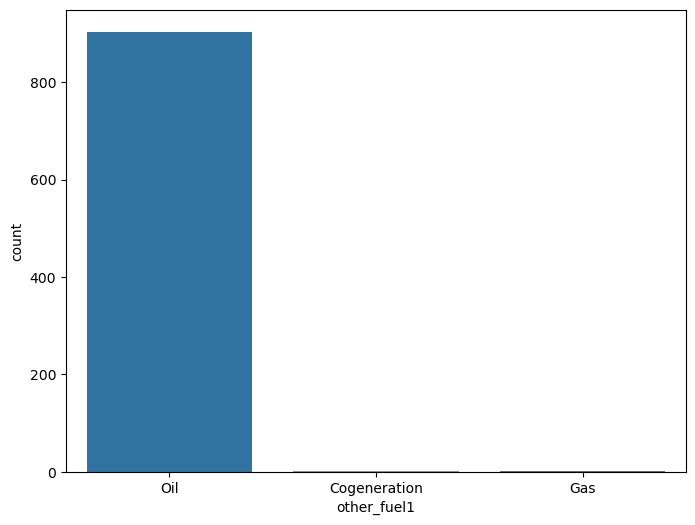

In [292]:
plt.figure(figsize=(8,6))
sns.countplot(df['other_fuel1'])
print(df['other_fuel1'].value_counts())
plt.show()

We see that oil is used more as other_fuel for electricity generation and very least or no usage of gas and cogeneration for electricity generation.

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


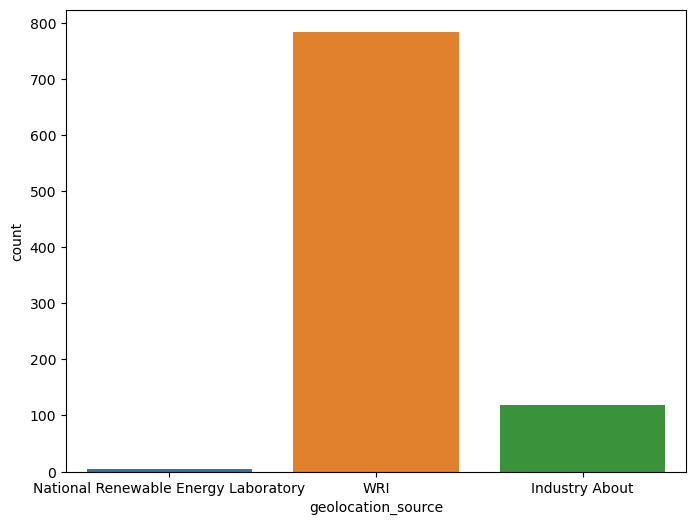

In [293]:
plt.figure(figsize=(8,6))
sns.countplot(df['geolocation_source'])
print(df['geolocation_source'].value_counts())
plt.show()

We see WRI gives more geolocation information than industry about and National Renewable Energy Laboratory.

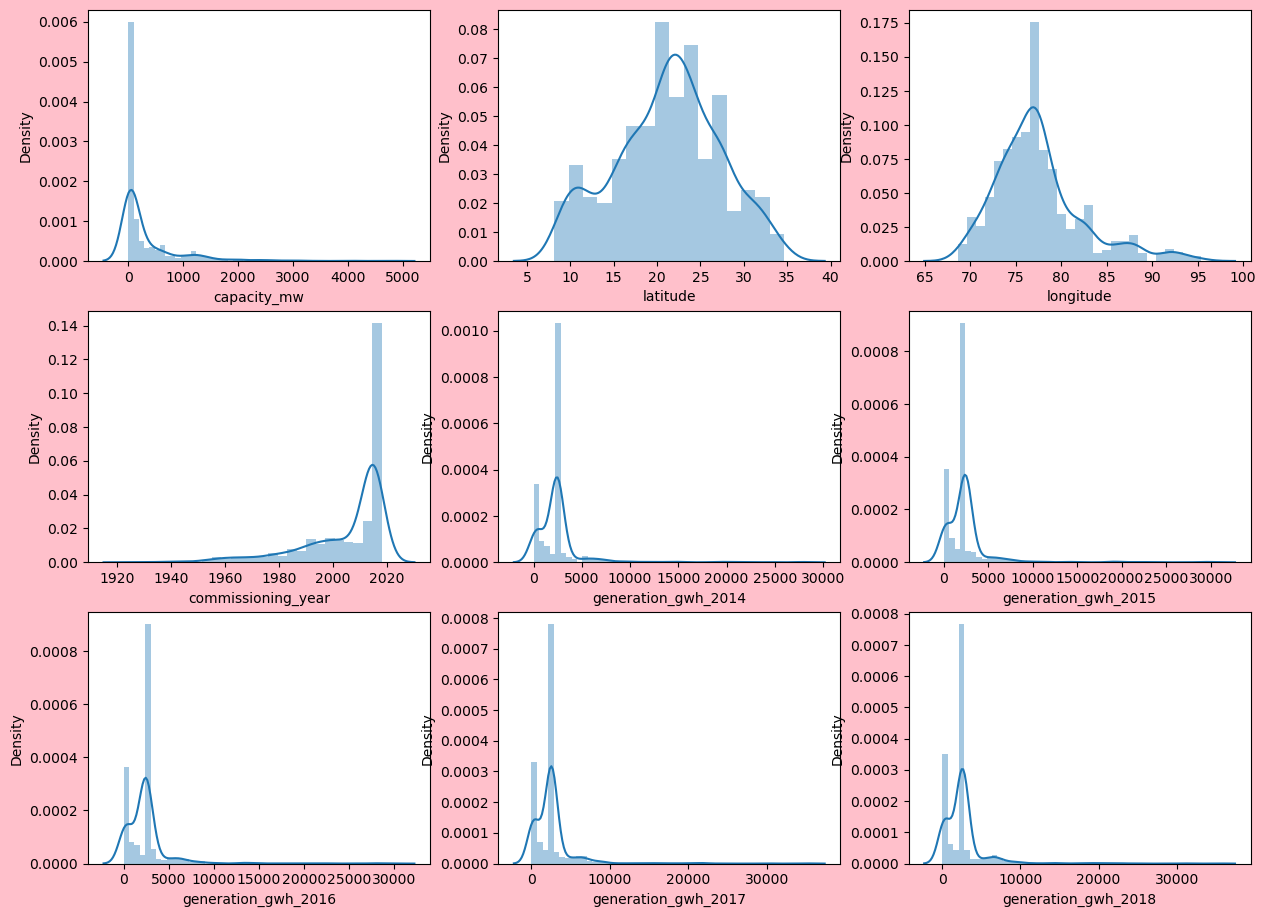

In [294]:
plt.figure(figsize =(15,15), facecolor = 'pink')
num = 1
for column in numerical_col:
    if num <=10:
        plt.subplot(4,3,num)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 10)
        
    num +=1
plt.show()

we see there is skewness in almost all the columns except longitude and latitude and also there is outliers. we will treat these skewness next using specific techniques 

#### Comparision with Capacity_mw and all other features

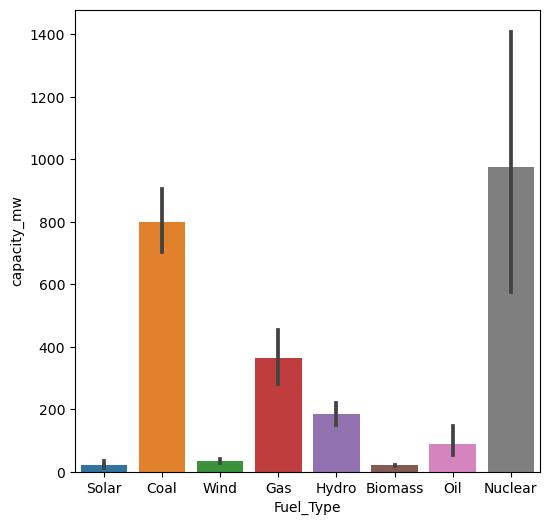

In [295]:
plt.figure(figsize = (6,6))
sns.barplot(x = 'Fuel_Type', y='capacity_mw', data = df)
plt.show()

we see there is high capacity of electricity generation with Nuclear and coal fuel types. comapred to all other fuel_types.

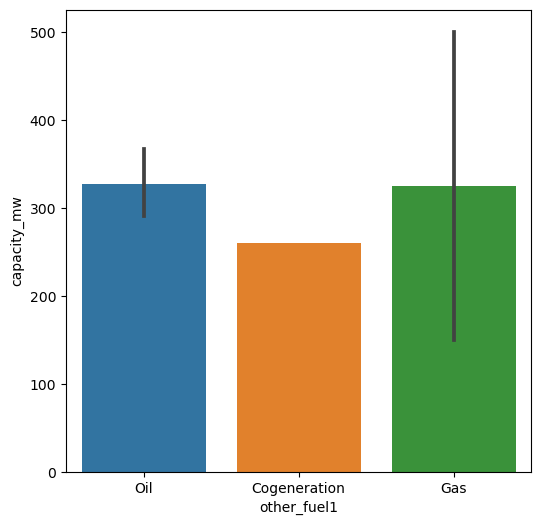

In [296]:
plt.figure(figsize = (6,6))
sns.barplot(x = 'other_fuel1', y='capacity_mw', data = df)
plt.show()

We see there is almost equal capacity of electricity generation with oil and gas compared to cogeneration.

In [297]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'Fuel_Type', 'other_fuel1',
       'commissioning_year', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

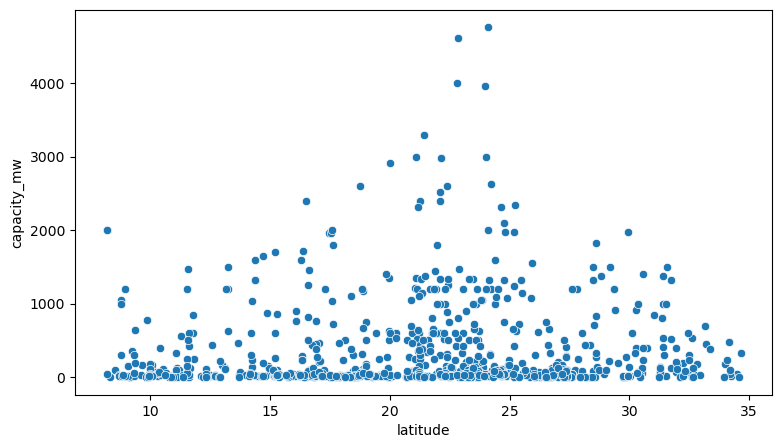

In [298]:
plt.figure(figsize = (9,5))
sns.scatterplot(x='latitude',y='capacity_mw', data=df)
plt.show()

We see there is no linear relationship between longitude and capacity.Most of the values of capacity are between 0 and 2000. We see there are outliers

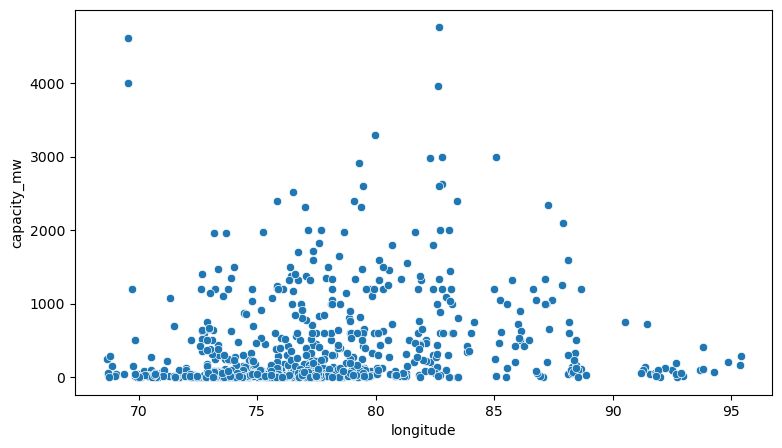

In [299]:
plt.figure(figsize = (9,5))
sns.scatterplot(x='longitude',y='capacity_mw', data=df)
plt.show()

We see that the values of longitude between 70 to 82 are having huge capacity values ranging between 0 to 1000. Here also we see outliers.

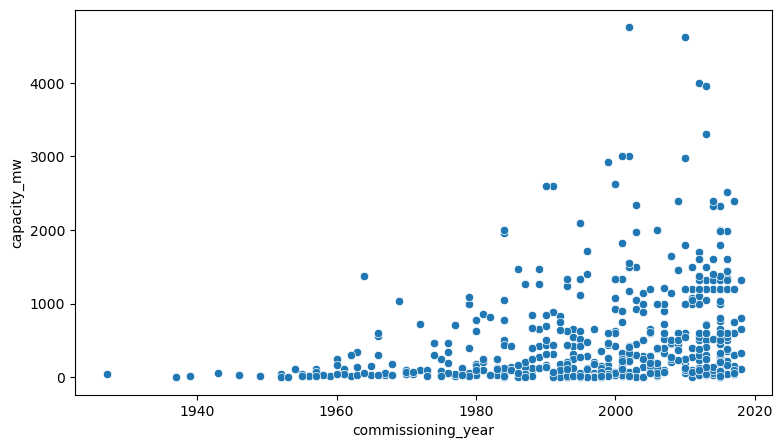

In [300]:
plt.figure(figsize = (9,5))
sns.scatterplot(x='commissioning_year',y='capacity_mw', data=df)
plt.show()

We see that as the comissioning year of the plants becomes old the capacity also reduces and the new plants have huge capacity above 3000.

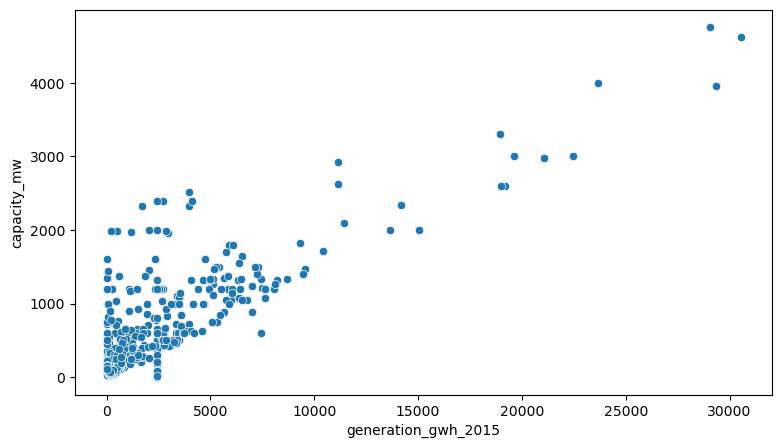

In [301]:
plt.figure(figsize = (9,5))
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw', data=df)
plt.show()

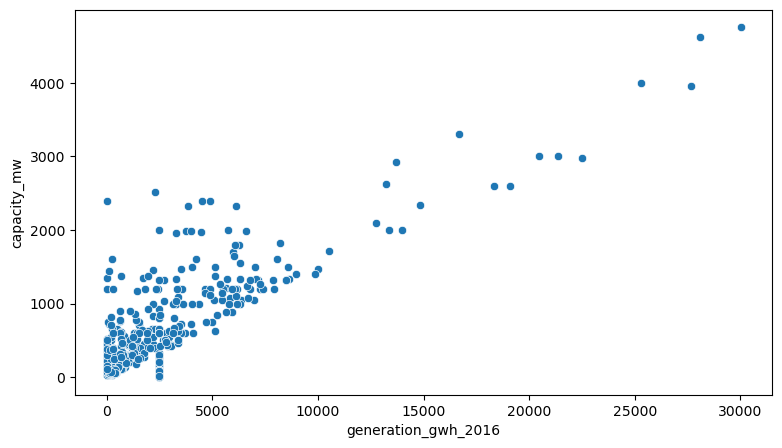

In [302]:
plt.figure(figsize = (9,5))
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw', data=df)
plt.show()

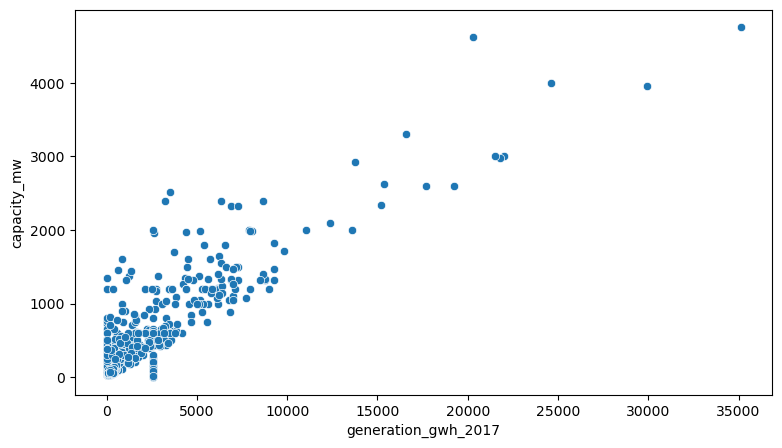

In [303]:
plt.figure(figsize = (9,5))
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw', data=df)
plt.show()

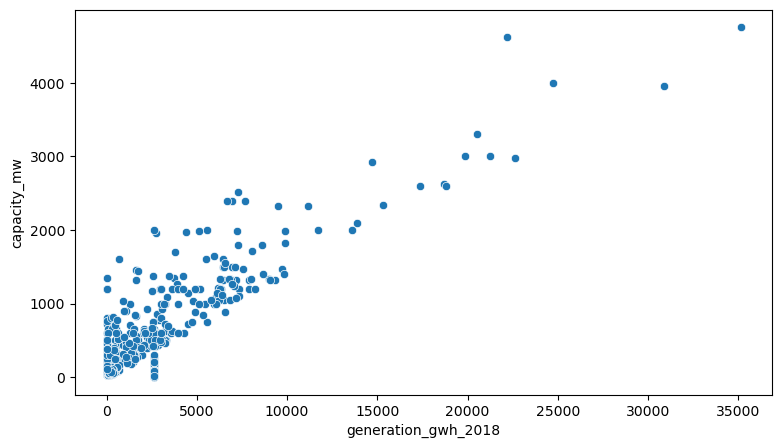

In [304]:
plt.figure(figsize = (9,5))
sns.scatterplot(x='generation_gwh_2018',y='capacity_mw', data=df)
plt.show()

We see that there is a linear relation between the capacity and the generation_gwh of all the years i.e., as the generation_gwh increases the capacity_mw also increases in all the years

#### Comparision of fuel_type with all other features

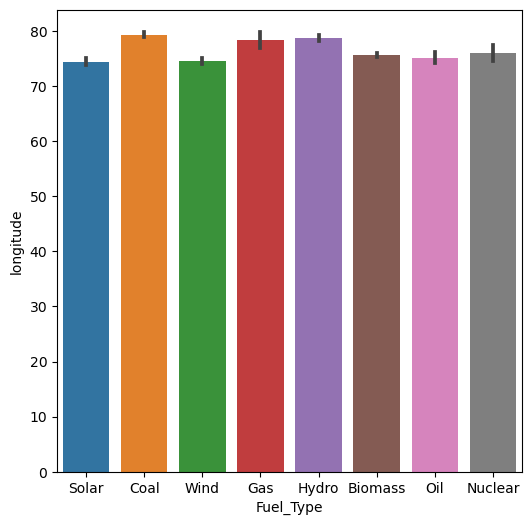

In [305]:
plt.figure(figsize = (6,6))
sns.barplot(x = 'Fuel_Type', y='longitude', data = df)
plt.show()

we see that coal, hydro, gas as high number of longitude compared to all other fuel_types.

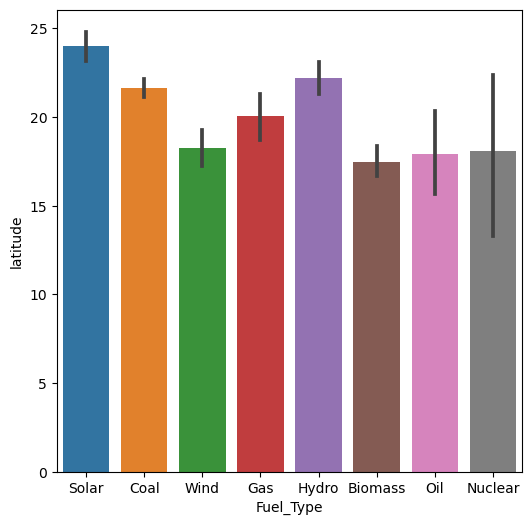

In [306]:
plt.figure(figsize = (6,6))
sns.barplot(x = 'Fuel_Type', y='latitude', data = df)
plt.show()

We see that latitude is high for solar followed by hydro and then coal but other fuels have less latitude.

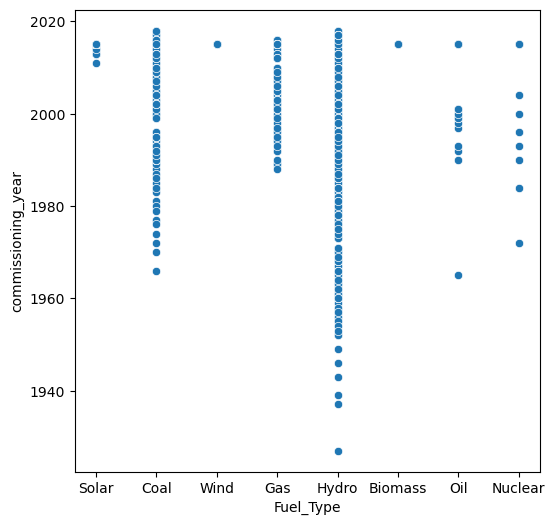

In [307]:
plt.figure(figsize = (6,6))
sns.scatterplot(x = 'Fuel_Type', y='commissioning_year', data = df)
plt.show()

we see that earlier there was a huge usage of hydro and coal types for electric generation. But, nowadays there is a usage of almost all types of fuels for electric generation.

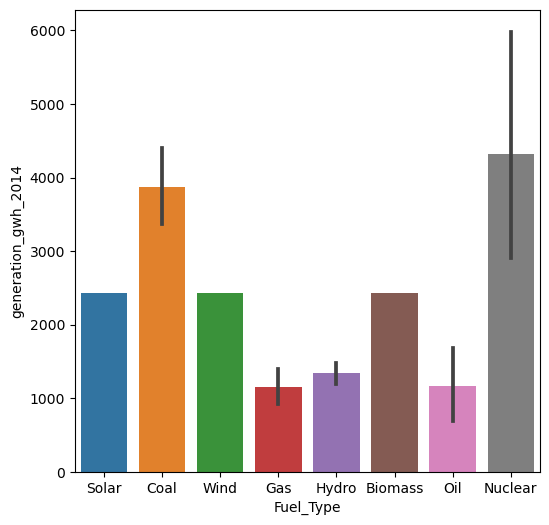

In [308]:
plt.figure(figsize = (6,6))
sns.barplot(x = 'Fuel_Type', y='generation_gwh_2014', data = df)
plt.show()

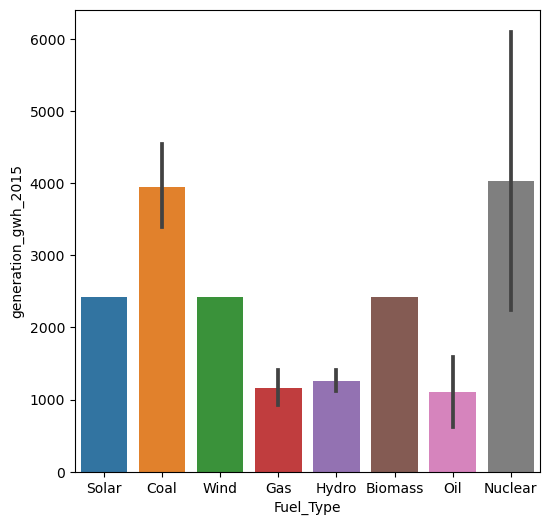

In [309]:
plt.figure(figsize = (6,6))
sns.barplot(x = 'Fuel_Type', y='generation_gwh_2015', data = df)
plt.show()

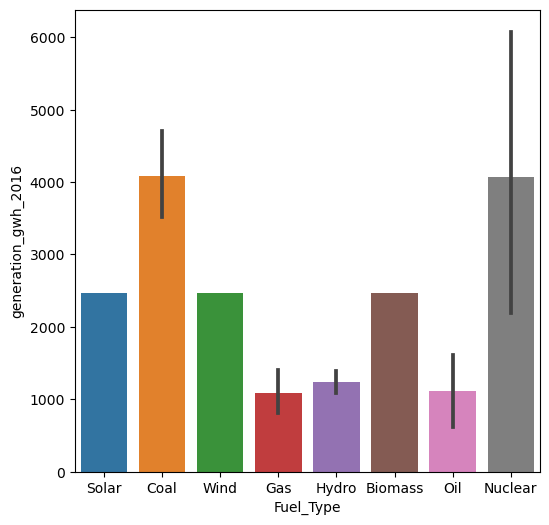

In [310]:
plt.figure(figsize = (6,6))
sns.barplot(x = 'Fuel_Type', y='generation_gwh_2016', data = df)
plt.show()

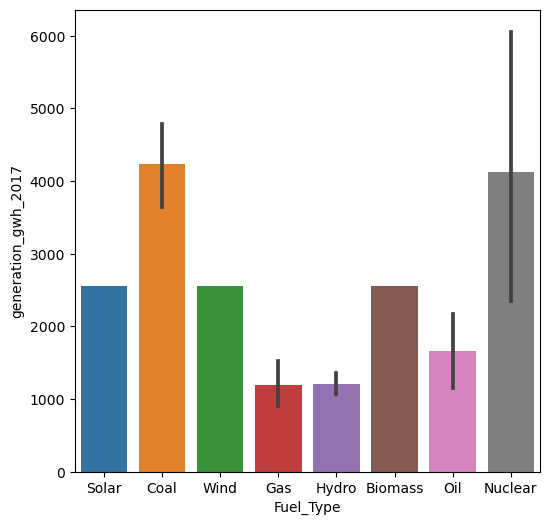

In [311]:
plt.figure(figsize = (6,6))
sns.barplot(x = 'Fuel_Type', y='generation_gwh_2017', data = df)
plt.show()

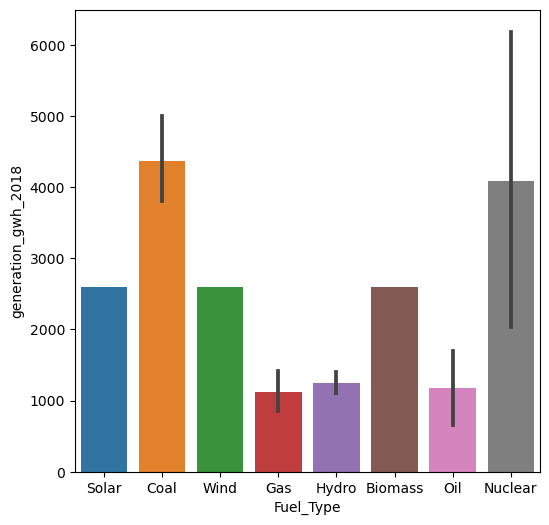

In [312]:
plt.figure(figsize = (6,6))
sns.barplot(x = 'Fuel_Type', y='generation_gwh_2018', data = df)
plt.show()

we see that in all the years there is huge reports of electricity generation using coal and Nuclear, compared to all other modes of electric generation.

In [313]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = le.fit_transform(df[i])
df

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2,2011.0,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,2,2015.0,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,2,2015.0,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2,2004.0,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2,2015.0,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,2016.0,2,2431.823590,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,2,2015.0,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,7,2,2015.0,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,1,2,2015.0,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


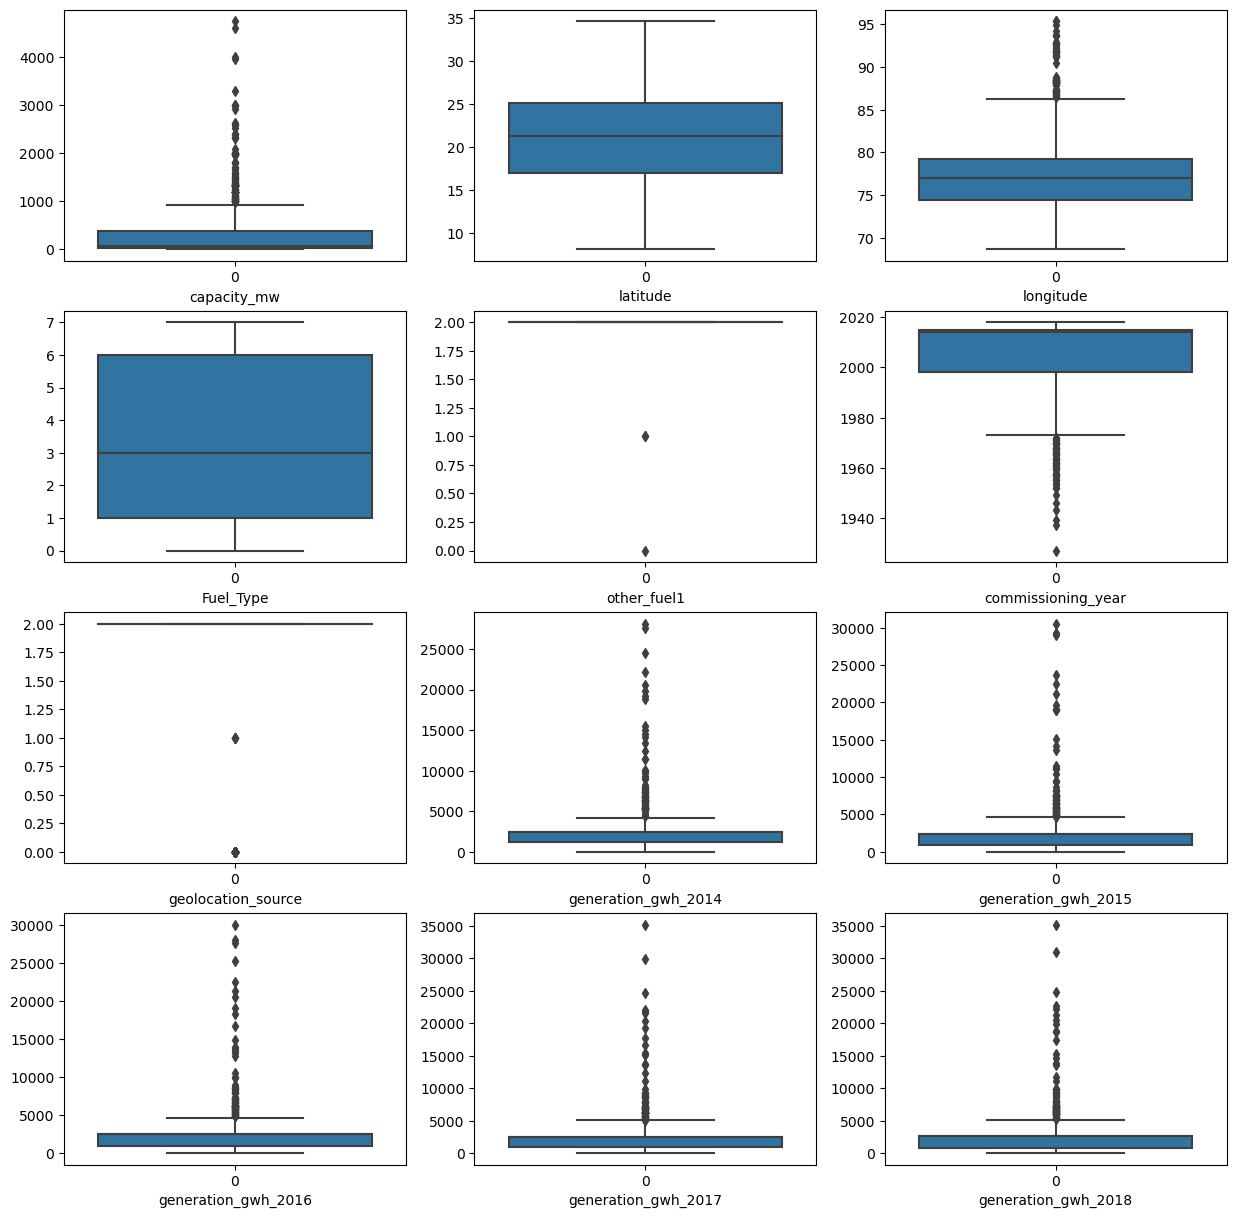

In [314]:
#plot BoxPlot
plt.figure(figsize =(15,15), facecolor = 'white')
num = 1
for column in df:
    if num <=12:
        plt.subplot(4,3,num)
        sns.boxplot(data = df[column])
        plt.xlabel(column,fontsize = 10)
        
    num +=1
plt.show()

We see that except latitude and capacity_mw there is outliers in all the columns. so we need to treat the outliers

In [315]:
features = df[['longitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]

In [316]:
from scipy.stats import zscore
z = np.abs(zscore(features))
np.where(z>3) #threshold = 3
features_df=df[(z<3).all(axis=1)]
print(features_df.shape)
print("data_loss =   ", ((df.shape[0]-features_df.shape[0])/df.shape[0])*100)

(856, 12)
data_loss =    5.622932745314222


In [317]:
q1 = features.quantile(0.25)
q3 = features.quantile(0.75)

iqr = q3-q1

features_iqr_df = df[~((df <(q1 - 1.5*iqr))| (df>(q3+1.5*iqr))).any(axis=1)]
print(features_iqr_df.shape)
print("data_loss =   ", ((df.shape[0]-features_iqr_df.shape[0])/df.shape[0])*100)

(705, 12)
data_loss =    22.27122381477398


We see that using z_score method data_loss is 5.62% and IQR method is 22.27%. So, we will consider dataframe after using z_score method.

In [318]:
features_df.reset_index(inplace=True)

In [319]:
features_df

,index,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,28.1839,73.2407,6,2,2011.0,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,1,98.0,24.7663,74.6090,1,2,2015.0,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,2,39.2,21.9038,69.3732,7,2,2015.0,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,3,135.0,23.8712,91.3602,2,2,2004.0,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,4,1800.0,21.9603,82.4091,1,2,2015.0,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,902,1600.0,16.2949,77.3568,1,2,2016.0,2,2431.823590,0.994875,233.596650,865.400000,686.500000
852,903,3.0,12.8932,78.1654,6,2,2015.0,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
853,904,25.5,15.2758,75.5811,7,2,2015.0,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
854,905,80.0,24.3500,73.7477,1,2,2015.0,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [320]:
features_df.drop('index',axis=1, inplace=True)
features_df


,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2,2011.0,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,2,2015.0,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,2,2015.0,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2,2004.0,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2,2015.0,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
851,1600.0,16.2949,77.3568,1,2,2016.0,2,2431.823590,0.994875,233.596650,865.400000,686.500000
852,3.0,12.8932,78.1654,6,2,2015.0,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
853,25.5,15.2758,75.5811,7,2,2015.0,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
854,80.0,24.3500,73.7477,1,2,2015.0,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [321]:
features_df.skew()

capacity_mw             2.165339
latitude               -0.110671
longitude               0.918260
Fuel_Type               0.420700
other_fuel1           -19.867532
commissioning_year     -1.542463
geolocation_source     -2.076336
generation_gwh_2014     1.523683
generation_gwh_2015     1.374516
generation_gwh_2016     1.388521
generation_gwh_2017     1.292164
generation_gwh_2018     1.419835
dtype: float64

we see there is huge skewness in all the columns except latitude, londitude and fuel_type, so we will reduce the skewness using some of the techniques. But in 'other_fuel1' there is huge skewness, so we will drop this feature.Geolocation_source is a categorical data and capacity_mw is target variable so no need to remove skewness.

In [322]:
features_df = df

In [323]:
df.drop('other_fuel1', axis=1, inplace=True)
df

,capacity_mw,latitude,longitude,Fuel_Type,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,2015.0,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,2015.0,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2004.0,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.0,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.0,2,2431.823590,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,2015.0,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,7,2015.0,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,1,2015.0,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [324]:
from scipy.stats import boxcox, yeojohnson

In [325]:
df['commissioning_year'] = np.sqrt(df['commissioning_year'])

In [326]:
df['generation_gwh_2014'] = yeojohnson(df['generation_gwh_2014'])[0]
df['generation_gwh_2015'] = yeojohnson(df['generation_gwh_2015'])[0]
df['generation_gwh_2016'] = yeojohnson(df['generation_gwh_2016'])[0]
df['generation_gwh_2017'] = yeojohnson(df['generation_gwh_2017'])[0]
df['generation_gwh_2018'] = yeojohnson(df['generation_gwh_2018'])[0]

In [327]:
df.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
Fuel_Type              0.472251
commissioning_year    -1.724880
geolocation_source    -2.159841
generation_gwh_2014    0.123226
generation_gwh_2015    0.074582
generation_gwh_2016    0.041821
generation_gwh_2017    0.018337
generation_gwh_2018    0.000783
dtype: float64

In [328]:
df['commissioning_year'] = np.cbrt(df['commissioning_year'])

In [329]:
df['longitude'] = np.sqrt(df['longitude'])

In [330]:
df.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.036861
Fuel_Type              0.472251
commissioning_year    -1.731601
geolocation_source    -2.159841
generation_gwh_2014    0.123226
generation_gwh_2015    0.074582
generation_gwh_2016    0.041821
generation_gwh_2017    0.018337
generation_gwh_2018    0.000783
dtype: float64

We see still there is a skewness in longitude and commissioning_year, but we will move forward with next process.

In [331]:
df.corr()

,capacity_mw,latitude,longitude,Fuel_Type,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.198206,-0.380395,-0.003347,0.204865,0.451642,0.455370,0.490592,0.508935,0.511127
latitude,0.050984,1.000000,0.030418,-0.010204,0.034842,-0.184275,0.063309,0.055447,0.069114,0.044483,0.049369
longitude,0.198206,0.030418,1.000000,-0.353108,-0.160773,0.256957,-0.086808,-0.098368,-0.059905,-0.077549,-0.077986
Fuel_Type,-0.380395,-0.010204,-0.353108,1.000000,0.164195,-0.483217,-0.002429,0.004981,-0.005088,0.002259,-0.000451
commissioning_year,-0.003347,0.034842,-0.160773,0.164195,1.000000,-0.259193,0.264420,0.279511,0.309263,0.284518,0.285448
geolocation_source,0.204865,-0.184275,0.256957,-0.483217,-0.259193,1.000000,-0.113175,-0.122923,-0.124496,-0.123368,-0.126921
generation_gwh_2014,0.451642,0.063309,-0.086808,-0.002429,0.264420,-0.113175,1.000000,0.885828,0.853772,0.794368,0.805846
generation_gwh_2015,0.455370,0.055447,-0.098368,0.004981,0.279511,-0.122923,0.885828,1.000000,0.922216,0.834312,0.844333
generation_gwh_2016,0.490592,0.069114,-0.059905,-0.005088,0.309263,-0.124496,0.853772,0.922216,1.000000,0.910642,0.915202
generation_gwh_2017,0.508935,0.044483,-0.077549,0.002259,0.284518,-0.123368,0.794368,0.834312,0.910642,1.000000,0.952417


In [332]:
df.corr().sum()

capacity_mw            3.487981
latitude               1.203487
longitude              0.571084
Fuel_Type             -0.063459
commissioning_year     2.198883
geolocation_source    -0.075746
generation_gwh_2014    4.916773
generation_gwh_2015    5.060708
generation_gwh_2016    5.281312
generation_gwh_2017    5.131016
generation_gwh_2018    5.158383
dtype: float64

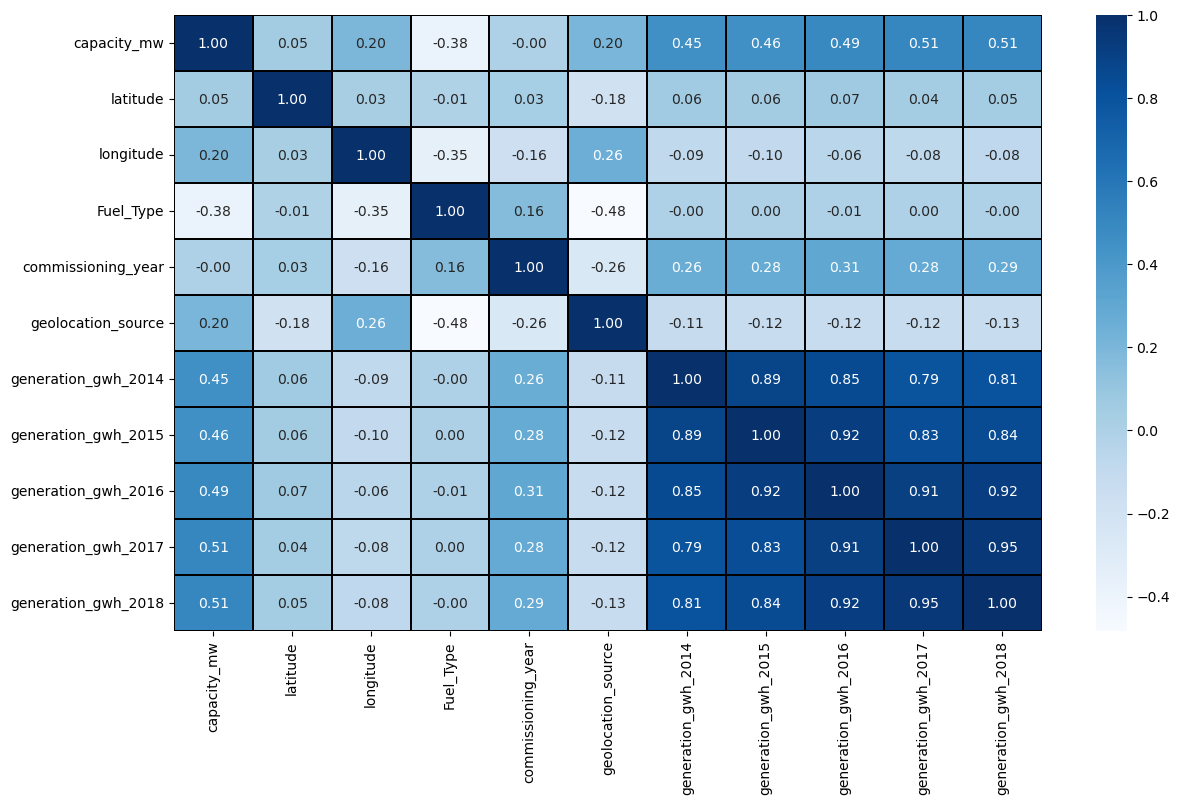

In [333]:
plt.figure(figsize = (14,8))
sns.heatmap(df.corr(), linewidths = 0.1, fmt = '0.2f', linecolor = "Black", annot=True, cmap = "Blues")
plt.show()

We see that generation_gwh of all the years are highly positively correlated with eachother.
with targets capacity_mw there is positive correlation with all the features except fuel_type and comissioning year.
with target fuel_type there is no such correlation with any of the features.

### capacity_mw Prediction

#### Standard Scaler

In [334]:
cap_x = df.drop(columns = ['capacity_mw'], axis = 1)
cap_y = df['capacity_mw']

In [335]:
cap_x

,latitude,longitude,Fuel_Type,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,28.1839,8.558078,6,3.552783,1,49.762501,45.278896,45.115342,46.996757,45.570343
1,24.7663,8.637650,1,3.553960,2,49.762501,45.278896,45.115342,46.996757,45.570343
2,21.9038,8.329058,7,3.553960,2,49.762501,45.278896,45.115342,46.996757,45.570343
3,23.8712,9.558253,2,3.550719,2,28.298185,29.803674,30.140518,27.455516,26.006880
4,21.9603,9.077946,1,3.553960,2,54.431457,63.916253,64.507244,62.936448,67.582879
...,...,...,...,...,...,...,...,...,...,...
902,16.2949,8.795271,1,3.554254,2,49.762501,0.786412,17.453824,30.575876,26.985431
903,12.8932,8.841120,6,3.553960,0,49.762501,45.278896,45.115342,46.996757,45.570343
904,15.2758,8.693739,7,3.553960,2,49.762501,45.278896,45.115342,46.996757,45.570343
905,24.3500,8.587648,1,3.553960,2,49.762501,45.278896,45.115342,46.996757,45.570343


In [336]:
cap_y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 907, dtype: float64

In [337]:
from sklearn.preprocessing import StandardScaler
sr = StandardScaler()
x = pd.DataFrame(sr.fit_transform(cap_x), columns = cap_x.columns)
x

,latitude,longitude,Fuel_Type,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.149805,-0.889214,1.225688,0.407760,-1.083349,0.287071,0.311796,0.315787,0.312925,0.321938
1,0.587311,-0.593439,-0.967877,0.659791,0.394241,0.287071,0.311796,0.315787,0.312925,0.321938
2,0.116179,-1.740500,1.664401,0.659791,0.394241,0.287071,0.311796,0.315787,0.312925,0.321938
3,0.439989,2.828508,-0.529164,-0.034301,0.394241,-0.864800,-0.579716,-0.542819,-0.750910,-0.771699
4,0.125479,1.043172,-0.967877,0.659791,0.394241,0.537628,1.385476,1.427655,1.180690,1.552482
...,...,...,...,...,...,...,...,...,...,...
902,-0.806975,-0.007549,-0.967877,0.722734,0.394241,0.287071,-2.251373,-1.270233,-0.581036,-0.716996
903,-1.366853,0.162872,1.225688,0.659791,-2.560940,0.287071,0.311796,0.315787,0.312925,0.321938
904,-0.974707,-0.384952,1.664401,0.659791,0.394241,0.287071,0.311796,0.315787,0.312925,0.321938
905,0.518793,-0.779300,-0.967877,0.659791,0.394241,0.287071,0.311796,0.315787,0.312925,0.321938


#### Now the data have been sclaed. Next, we wil check with the multicollinearity

In [338]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF Values,Features
0,1.057806,latitude
1,1.187911,longitude
2,1.435003,Fuel_Type
3,1.185002,commissioning_year
4,1.450695,geolocation_source
5,4.943575,generation_gwh_2014
6,8.951566,generation_gwh_2015
7,13.122985,generation_gwh_2016
8,12.026306,generation_gwh_2017
9,12.694198,generation_gwh_2018


we see that generation_gwh_2016, generation_gwh_2017, generation_gwh_2018 are having high multicollinearity, so we will check again after dropping generation_gwh_2016.

In [341]:
x.drop('generation_gwh_2016', axis=1, inplace=True)

In [342]:
vif = pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF Values,Features
0,1.054265,latitude
1,1.174630,longitude
2,1.434956,Fuel_Type
3,1.169771,commissioning_year
4,1.450635,geolocation_source
5,4.918070,generation_gwh_2014
6,6.020276,generation_gwh_2015
7,3.721396,generation_gwh_2018


In [339]:
x.drop('generation_gwh_2017', axis=1, inplace=True)

In [340]:
vif = pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF Values,Features
0,1.056928,latitude
1,1.187333,longitude
2,1.434958,Fuel_Type
3,1.185000,commissioning_year
4,1.450695,geolocation_source
5,4.941254,generation_gwh_2014
6,8.921425,generation_gwh_2015
7,12.192804,generation_gwh_2016
8,6.303457,generation_gwh_2018


So, now we have removed the multicollinearity, next we will build a model.

### Model Building

In [343]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [344]:
accuracy = 0
r_state =0
for i in range(1,200):
    x_train_cap,x_test_cap,y_train_cap,y_test_cap = train_test_split(x, cap_y, test_size = 0.25, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train_cap,y_train_cap)
    y_pred = lr.predict(x_test_cap)
    acc = r2_score(y_test_cap,y_pred)
    if acc>accuracy:
        accuracy=acc
        r_state = i
print("maximum r2 score is ", accuracy , "at randomstate = ",r_state)

maximum r2 score is  0.5403555246497757 at randomstate =  8


In [347]:
x_train_cap,x_test_cap,y_train_cap,y_test_cap = train_test_split(x, cap_y, test_size = 0.25, random_state = 8)

In [348]:
x_train_cap.shape

(680, 8)

In [349]:
y_train_cap.shape

(680,)

In [350]:
x_test_cap.shape

(227, 8)

In [352]:
y_test_cap.shape

(227,)

In [353]:
model=[LinearRegression(), Lasso(), Ridge(), GradientBoostingRegressor(), AdaBoostRegressor(), RandomForestRegressor(), 
       ExtraTreesRegressor(), DecisionTreeRegressor(), KNN(), SVR()]
for i in model:
    print("*" *60)
    print('accuracy score of : ',i)
    i.fit(x_train_cap,y_train_cap)
    pred = i.predict(x_test_cap)
    
    print("R2 Score:                ", r2_score(y_test_cap,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y_test_cap,pred))
    print("Mean Squared Error:      ", mean_squared_error(y_test_cap,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test_cap,pred)))
    cross_score=cross_val_score(i,x,cap_y,cv=5)
    print(cross_score)
    
    print("Cross Validation Score:  ",np.mean(cross_score))
    print("Difference between R2 score and Cross Validation Score is :  ", r2_score(y_test_cap,pred)-cross_score.mean())
    print("*" *60)
    print("\n")

************************************************************
accuracy score of :  LinearRegression()
R2 Score:                 0.5403555246497757
Mean Absolute Error:      249.65181549331913
Mean Squared Error:       121048.84379734163
Root Mean Squared Error:  347.9207435571234
[0.29848809 0.19414172 0.40363442 0.48263375 0.50810344]
Cross Validation Score:   0.3774002855043148
Difference between R2 score and Cross Validation Score is :   0.16295523914546084
************************************************************


************************************************************
accuracy score of :  Lasso()
R2 Score:                 0.540597748303351
Mean Absolute Error:      249.601914853439
Mean Squared Error:       120985.05342287163
Root Mean Squared Error:  347.8290577609519
[0.30426543 0.1958838  0.40371178 0.48215954 0.50725973]
Cross Validation Score:   0.378656054528255
Difference between R2 score and Cross Validation Score is :   0.16194169377509593
************************

1. Linear - R2 Score: 0.54035             CV diff:  0.16295
2. Lasso  - R2 Score: 0.54059             CV diff:  0.16194
3. Ridge  - R2 Score: 0.54020             CV diff:  0.16253
4. GradientBoosting - R2 Score: 0.84464   CV diff:  0.01076
5. AdaBoost - R2 Score: 0.68351           CV diff:  -0.02151
6. RandomForest - R2 Score: 0.87120       CV diff:  0.01758
7. ExtraTrees -   R2 Score: 0.87948       CV diff:  0.01974
8. DecisionTree - R2 Score: 0.68397       CV diff:  -0.07207
9. KNN Regressor- r2 Score: 0.83525       CV diff:  0.06085
10. SVR      - R2 Score:-0.20816          CV diff:  -0.03299

we see that GradientBoosting Regressor is having least difference and also better r2 score, so we will tune parameters for GradientBoosting model, so that we can increase the r2 score and get better result. 

In [354]:
param_grid_gbr = {"n_estimators": [30,32,38], "learning_rate" :[0.001,0.01, 0.1], 
                  "max_depth":[8,10,12,14],"criterion":['friedman_mse','squared_error'],"max_features":['sqrt','log2']}

In [355]:
gd_gbr = GridSearchCV(GradientBoostingRegressor(), param_grid_gbr, cv=5)
gd_gbr.fit(x_train_cap,y_train_cap)


best_parameters=gd_gbr.best_params_
print(best_parameters)
best_result=gd_gbr.best_score_
print(best_result*100)

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 14, 'max_features': 'sqrt', 'n_estimators': 32}
86.29713559247604


In [366]:
capacity = GradientBoostingRegressor(criterion='friedman_mse', learning_rate=0.1, max_depth=14, max_features='sqrt', n_estimators=32)

In [367]:
capacity.fit(x_train_cap,y_train_cap)
capacity_pred = capacity.predict(x_test_cap)
capacity_r2 = r2_score(y_test_cap, capacity_pred)
capacity_mae = mean_absolute_error(y_test_cap, capacity_pred)
capacity_mse = mean_squared_error(y_test_cap, capacity_pred)
capacity_rmse = np.sqrt(mean_squared_error(y_test_cap, capacity_pred))

print("r2Score of test data is  ",capacity_r2)
print("Mean absolute error of test data is  ", capacity_mae)
print("Mean squared error of test data is  ", capacity_mse)
print("Root Mean squared error of test data is  ", capacity_rmse)
print("\n")

r2Score of test data is   0.8817060349971352
Mean absolute error of test data is   102.47988344935276
Mean squared error of test data is   31153.09431466442
Root Mean squared error of test data is   176.50239181003872




### We see that after tuning the parameters with {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 14, 'max_features': 'sqrt', 'n_estimators': 32},  there is increase in r2 score from 84 % to 88%. MAE, MSE, RMSE have also been reduced. so, we consider Gradient boosting regression as the best and accurate model for predicting capacity_mw.

,Actual,Predicted
207,20.00,28.929501
871,30.75,47.142833
305,400.00,147.101783
739,130.00,76.090008
312,440.00,790.988191
763,5.00,19.395842
731,3.30,22.973202
330,225.00,376.685515
254,36.00,68.650606
771,15.00,26.432882


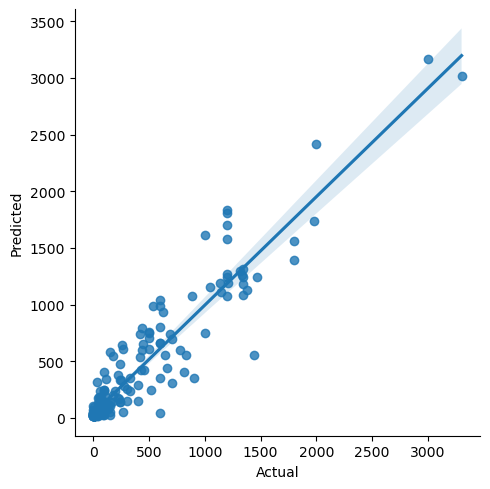

In [369]:
capacity_mw_df = pd.DataFrame({'Actual':y_test_cap , 'Predicted':capacity_pred},columns=['Actual','Predicted'])
sns.lmplot(x='Actual',y='Predicted', data=capacity_mw_df)
capacity_mw_df.head(25)

### Save the capacity Model

In [370]:
import joblib
joblib.dump(capacity,'capacity_mw_prediction.pkl')

['capacity_mw_prediction.pkl']

In [371]:
capacity_model = joblib.load('capacity_mw_prediction.pkl')
result = capacity_model.score(x_test_cap,y_test_cap)
print(result)

0.8817060349971352


### Fuel Type Prediction

In [372]:
df

,capacity_mw,latitude,longitude,Fuel_Type,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,8.558078,6,3.552783,1,49.762501,45.278896,45.115342,46.996757,45.570343
1,98.0,24.7663,8.637650,1,3.553960,2,49.762501,45.278896,45.115342,46.996757,45.570343
2,39.2,21.9038,8.329058,7,3.553960,2,49.762501,45.278896,45.115342,46.996757,45.570343
3,135.0,23.8712,9.558253,2,3.550719,2,28.298185,29.803674,30.140518,27.455516,26.006880
4,1800.0,21.9603,9.077946,1,3.553960,2,54.431457,63.916253,64.507244,62.936448,67.582879
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,8.795271,1,3.554254,2,49.762501,0.786412,17.453824,30.575876,26.985431
903,3.0,12.8932,8.841120,6,3.553960,0,49.762501,45.278896,45.115342,46.996757,45.570343
904,25.5,15.2758,8.693739,7,3.553960,2,49.762501,45.278896,45.115342,46.996757,45.570343
905,80.0,24.3500,8.587648,1,3.553960,2,49.762501,45.278896,45.115342,46.996757,45.570343


In [373]:
df.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.036861
Fuel_Type              0.472251
commissioning_year    -1.731601
geolocation_source    -2.159841
generation_gwh_2014    0.123226
generation_gwh_2015    0.074582
generation_gwh_2016    0.041821
generation_gwh_2017    0.018337
generation_gwh_2018    0.000783
dtype: float64

In [374]:
df.corr().sum()

capacity_mw            3.487981
latitude               1.203487
longitude              0.571084
Fuel_Type             -0.063459
commissioning_year     2.198883
geolocation_source    -0.075746
generation_gwh_2014    4.916773
generation_gwh_2015    5.060708
generation_gwh_2016    5.281312
generation_gwh_2017    5.131016
generation_gwh_2018    5.158383
dtype: float64

In [375]:
fuel_x = df.drop(columns = ['Fuel_Type'], axis = 1)
fuel_y = df['Fuel_Type']

#### Standard Scaler

In [376]:
sr = StandardScaler()
x1 = pd.DataFrame(sr.fit_transform(fuel_x), columns = fuel_x.columns)
x1

,capacity_mw,latitude,longitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.548908,1.149805,-0.889214,0.407760,-1.083349,0.287071,0.311796,0.315787,0.312925,0.321938
1,-0.386977,0.587311,-0.593439,0.659791,0.394241,0.287071,0.311796,0.315787,0.312925,0.321938
2,-0.486679,0.116179,-1.740500,0.659791,0.394241,0.287071,0.311796,0.315787,0.312925,0.321938
3,-0.324240,0.439989,2.828508,-0.034301,0.394241,-0.864800,-0.579716,-0.542819,-0.750910,-0.771699
4,2.498942,0.125479,1.043172,0.659791,0.394241,0.537628,1.385476,1.427655,1.180690,1.552482
...,...,...,...,...,...,...,...,...,...,...
902,2.159821,-0.806975,-0.007549,0.722734,0.394241,0.287071,-2.251373,-1.270233,-0.581036,-0.716996
903,-0.548060,-1.366853,0.162872,0.659791,-2.560940,0.287071,0.311796,0.315787,0.312925,0.321938
904,-0.509909,-0.974707,-0.384952,0.659791,0.394241,0.287071,0.311796,0.315787,0.312925,0.321938
905,-0.417498,0.518793,-0.779300,0.659791,0.394241,0.287071,0.311796,0.315787,0.312925,0.321938


In [377]:
vif = pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x1.values, i) for i in range(len(x1.columns))]
vif['Features'] = x1.columns

vif

,VIF Values,Features
0,1.632939,capacity_mw
1,1.054367,latitude
2,1.154706,longitude
3,1.196524,commissioning_year
4,1.257667,geolocation_source
5,4.960528,generation_gwh_2014
6,8.951964,generation_gwh_2015
7,13.123102,generation_gwh_2016
8,12.107077,generation_gwh_2017
9,12.793277,generation_gwh_2018


In [378]:
x1.drop('generation_gwh_2016', axis=1, inplace=True)

In [379]:
x1.drop('generation_gwh_2017', axis=1, inplace=True)

In [380]:
vif = pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x1.values, i) for i in range(len(x1.columns))]
vif['Features'] = x1.columns

vif

,VIF Values,Features
0,1.620840,capacity_mw
1,1.050579,latitude
2,1.141314,longitude
3,1.180460,commissioning_year
4,1.257025,geolocation_source
5,4.937088,generation_gwh_2014
6,6.023148,generation_gwh_2015
7,4.044122,generation_gwh_2018


so, now we have reduced the multicollinearity. Next we will build model.

In [381]:
fuel_y.value_counts()

1    258
3    251
6    127
7    123
2     69
0     50
5     20
4      9
Name: Fuel_Type, dtype: int64

In [382]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x1,y1 = sm.fit_resample(x1, fuel_y)

In [383]:
y1.value_counts()

6    258
1    258
7    258
2    258
3    258
0    258
5    258
4    258
Name: Fuel_Type, dtype: int64

In [385]:
x1

,capacity_mw,latitude,longitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2018
0,-0.548908,1.149805e+00,-0.889214,0.407760,-1.083349,0.287071,0.311796,0.321938
1,-0.386977,5.873110e-01,-0.593439,0.659791,0.394241,0.287071,0.311796,0.321938
2,-0.486679,1.161793e-01,-1.740500,0.659791,0.394241,0.287071,0.311796,0.321938
3,-0.324240,4.399887e-01,2.828508,-0.034301,0.394241,-0.864800,-0.579716,-0.771699
4,2.498942,1.254785e-01,1.043172,0.659791,0.394241,0.537628,1.385476,1.552482
...,...,...,...,...,...,...,...,...
2059,-0.507895,1.169464e-15,0.015287,0.659791,0.394241,0.287071,0.311796,0.321938
2060,-0.524324,5.016223e-02,-1.623531,0.659791,0.394241,0.287071,0.311796,0.321938
2061,-0.508030,-9.644163e-01,-0.382887,0.659791,0.394241,0.287071,0.311796,0.321938
2062,-0.494298,1.077970e-03,-0.681142,0.659791,0.394241,0.287071,0.311796,0.321938


### Model Building

In [384]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, classification_report, roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [386]:
accuracy = 0
r_state = 0
for i in range(1,100):
    x_train_fuel,x_test_fuel,y_train_fuel,y_test_fuel = train_test_split(x1, y1, test_size = 0.25, random_state = i)
    log = LogisticRegression()
    log.fit(x_train_fuel,y_train_fuel)
    y_pred_fuel = log.predict(x_test_fuel)
    acc = accuracy_score(y_test_fuel,y_pred_fuel)
    if acc>accuracy:
        accuracy = acc
        r_state = i
print("max accuracy score : ", accuracy,"at the random state: " , r_state)

max accuracy score :  0.6492248062015504 at the random state:  57


In [388]:
x_train_fuel,x_test_fuel,y_train_fuel,y_test_fuel = train_test_split(x1, y1, test_size = 0.25, random_state = 57)

In [389]:
x_train_fuel.shape

(1548, 8)

In [390]:
y_train_fuel.shape

(1548,)

In [391]:
x_test_fuel.shape

(516, 8)

In [392]:
y_test_fuel.shape

(516,)

In [393]:
log = LogisticRegression()
log.fit(x_train_fuel,y_train_fuel)
log_pred = log.predict(x_test_fuel)
log_pred_train = log.predict(x_train_fuel)
print("Logistic Regression")
print("Accuracy of train data is  ",accuracy_score(y_train_fuel, log_pred_train)*100, "%")
log_accu = accuracy_score(y_test_fuel, log_pred) 
print("Accuracy of test data is  ", (log_accu)*100 ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test_fuel,log_pred))
print('\n Test Classification Report \n', classification_report(y_test_fuel,log_pred))
print("****************************************")
print("\n")

rfc = RandomForestClassifier()
rfc.fit(x_train_fuel,y_train_fuel)
rfc_pred = rfc.predict(x_test_fuel)
rfc_pred_train = rfc.predict(x_train_fuel)
print("Random Forest Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train_fuel, rfc_pred_train)*100, "%")
rfc_accu = accuracy_score(y_test_fuel, rfc_pred) 
print("Accuracy of test data is  ", (rfc_accu)*100,"%")
print("\n Confusion Matrix", confusion_matrix(y_test_fuel,rfc_pred))
print('\n Test Classification Report \n', classification_report(y_test_fuel,rfc_pred))
print("****************************************")
print("\n")

bc = BaggingClassifier()
bc.fit(x_train_fuel,y_train_fuel)
bc_pred = bc.predict(x_test_fuel)
bc_pred_train = bc.predict(x_train_fuel)
print("Bagging Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train_fuel, bc_pred_train)*100, "%")
bc_accu = accuracy_score(y_test_fuel, bc_pred)
print("Accuracy of test data is  ", (bc_accu)*100,"%")
print("\n Confusion Matrix", confusion_matrix(y_test_fuel,bc_pred))
print('\n Test Classification Report \n', classification_report(y_test_fuel,bc_pred))
print("****************************************")
print("\n")

abc = AdaBoostClassifier()
abc.fit(x_train_fuel,y_train_fuel)
abc_pred = abc.predict(x_test_fuel)
abc_pred_train = abc.predict(x_train_fuel)
print("AdaBoost Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train_fuel, abc_pred_train)*100, "%")
abc_accu = accuracy_score(y_test_fuel, abc_pred)
print("Accuracy of test data is  ", (abc_accu) *100 ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test_fuel,abc_pred))
print('\n Test Classification Report \n', classification_report(y_test_fuel,abc_pred))
print("****************************************")
print("\n")

gbc = GradientBoostingClassifier()
gbc.fit(x_train_fuel,y_train_fuel)
gbc_pred = gbc.predict(x_test_fuel)
gbc_pred_train = gbc.predict(x_train_fuel)
print("Gradient Boosting Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train_fuel, gbc_pred_train)*100, "%")
gbc_accu = accuracy_score(y_test_fuel, gbc_pred) 
print("Accuracy of test data is  ", (gbc_accu)*100 ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test_fuel,gbc_pred))
print('\n Test Classification Report \n', classification_report(y_test_fuel,gbc_pred))
print("****************************************")
print("\n")

etc = ExtraTreesClassifier()
etc.fit(x_train_fuel,y_train_fuel)
etc_pred = etc.predict(x_test_fuel)
etc_pred_train = etc.predict(x_train_fuel)
print("Extra Trees Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train_fuel, etc_pred_train)*100, "%")
etc_accu = accuracy_score(y_test_fuel, etc_pred) 
print("Accuracy of test data is  ", (etc_accu)*100, "%")
print("\n Confusion Matrix", confusion_matrix(y_test_fuel,etc_pred))
print('\n Test Classification Report \n', classification_report(y_test_fuel,etc_pred))
print("****************************************")
print("\n")

dtc = DecisionTreeClassifier()
dtc.fit(x_train_fuel,y_train_fuel)
dtc_pred = dtc.predict(x_test_fuel)
dtc_pred_train = dtc.predict(x_train_fuel)
print("Decision Trees Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train_fuel, dtc_pred_train)*100, "%")
dtc_accu = accuracy_score(y_test_fuel, dtc_pred) 
print("Accuracy of test data is  ", (dtc_accu)*100 ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test_fuel,dtc_pred))
print('\n Test Classification Report \n', classification_report(y_test_fuel,dtc_pred))
print("****************************************")
print("\n")

knn = KNeighborsClassifier()
knn.fit(x_train_fuel,y_train_fuel)
knn_pred = knn.predict(x_test_fuel)
knn_pred_train = knn.predict(x_train_fuel)
print("K-Nearest Neighbors")
print("Accuracy of train data is  ",accuracy_score(y_train_fuel, knn_pred_train)*100, "%")
knn_accu = accuracy_score(y_test_fuel, knn_pred) 
print("Accuracy of test data is  ", (knn_accu)*100 ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test_fuel, knn_pred))
print('\n Test Classification Report \n', classification_report(y_test_fuel, knn_pred))
print("****************************************")
print("\n")


svc = SVC()
svc.fit(x_train_fuel,y_train_fuel)
svc_pred = svc.predict(x_test_fuel)
svc_pred_train = svc.predict(x_train_fuel)
print("Super-Vector Classification")
print("Accuracy of train data is  ",accuracy_score(y_train_fuel, svc_pred_train)*100 , "%")
svc_accu = accuracy_score(y_test_fuel, svc_pred) 
print("Accuracy of test data is  ", (svc_accu)*100,"%")
print("\n Confusion Matrix", confusion_matrix(y_test_fuel, svc_pred))
print('\n Test Classification Report \n', classification_report(y_test_fuel, svc_pred))
print("****************************************")
print("\n")


Logistic Regression
Accuracy of train data is   59.17312661498708 %
Accuracy of test data is   64.92248062015504 %

 Confusion Matrix [[35  0  0  0  0  0  0 27]
 [11 27  5  3  7  1  0  7]
 [ 0  6 33  6  3  9  0 11]
 [ 0  8 11 46  2  4  0  0]
 [ 0  1  0  4 59  0  0  0]
 [ 3  0  3  4  1 31  0 18]
 [ 1  0  0  0  0  0 71  0]
 [25  0  0  0  0  0  0 33]]

 Test Classification Report 
               precision    recall  f1-score   support

           0       0.47      0.56      0.51        62
           1       0.64      0.44      0.52        61
           2       0.63      0.49      0.55        68
           3       0.73      0.65      0.69        71
           4       0.82      0.92      0.87        64
           5       0.69      0.52      0.59        60
           6       1.00      0.99      0.99        72
           7       0.34      0.57      0.43        58

    accuracy                           0.65       516
   macro avg       0.67      0.64      0.64       516
weighted avg       0.6

Super-Vector Classification
Accuracy of train data is   81.2015503875969 %
Accuracy of test data is   83.13953488372093 %

 Confusion Matrix [[60  0  0  0  0  0  0  2]
 [11 35  3  2  2  0  0  8]
 [ 2  4 48  1  0 13  0  0]
 [ 0  1  9 61  0  0  0  0]
 [ 0  0  0  0 64  0  0  0]
 [ 3  0  0  1  0 56  0  0]
 [ 1  0  0  0  0  0 71  0]
 [22  0  0  0  0  2  0 34]]

 Test Classification Report 
               precision    recall  f1-score   support

           0       0.61      0.97      0.75        62
           1       0.88      0.57      0.69        61
           2       0.80      0.71      0.75        68
           3       0.94      0.86      0.90        71
           4       0.97      1.00      0.98        64
           5       0.79      0.93      0.85        60
           6       1.00      0.99      0.99        72
           7       0.77      0.59      0.67        58

    accuracy                           0.83       516
   macro avg       0.84      0.83      0.82       516
weighted avg   

In [394]:
Accuracy = pd.DataFrame({'Models':['Logistic', 'RandomForest Classifier', 'Bagging Classifier', 'AdaBoost Classifier', 'GradientBoosting','ExtraTreesClassifier','DecisionTree', 'Knn','svc'],
                          'Accuracy_score':[log_accu, rfc_accu, bc_accu,abc_accu,gbc_accu,etc_accu,dtc_accu,knn_accu,svc_accu]
                        })
Accuracy

,Models,Accuracy_score
0,Logistic,0.649225
1,RandomForest Classifier,0.906977
2,Bagging Classifier,0.899225
3,AdaBoost Classifier,0.463178
4,GradientBoosting,0.891473
5,ExtraTreesClassifier,0.932171
6,DecisionTree,0.874031
7,Knn,0.883721
8,svc,0.831395


### Cross-Validation Score

In [395]:
print('\n Logistic Regression \n')
log_score = cross_val_score(log, x1, y1, cv=5)
print(log_score)
print(np.mean(log_score))
log_diff = (log_accu - log_score.mean())
print(log_diff)
print("====================================\n ")


print('\n Random Forest Classifier \n')
rfc_score = cross_val_score(rfc, x1, y1, cv=5)
print(rfc_score)
print(np.mean(rfc_score))
rfc_diff = (rfc_accu - rfc_score.mean())
print(rfc_diff)
print("====================================\n ")


print('\n Bagging Classifier \n')
bc_score = cross_val_score(bc, x1, y1, cv=5)
print(bc_score)
print(np.mean(bc_score))
bc_diff = (bc_accu - bc_score.mean())
print(bc_diff)
print("====================================\n ")


print('\n AdaBoost Classifier \n')
abc_score = cross_val_score(abc, x1, y1, cv=5)
print(abc_score)
print(np.mean(abc_score))
abc_diff = (abc_accu - abc_score.mean())
print(abc_diff)
print("====================================\n ")


print('\n ExtraTrees Classifier \n')
etc_score = cross_val_score(etc, x1, y1, cv=5)
print(etc_score)
print(np.mean(etc_score))
etc_diff = (etc_accu - etc_score.mean())
print(etc_diff)
print("====================================\n ")

print('\n DecisionTree Classifier \n')
dtc_score = cross_val_score(dtc, x1, y1, cv=5)
print(dtc_score)
print(np.mean(dtc_score))
dtc_diff = (dtc_accu - dtc_score.mean())
print(dtc_diff)
print("====================================\n ")

print('\n K-Neighbors Classifier \n')
knn_score = cross_val_score(knn, x1, y1, cv=5)
print(knn_score)
print(np.mean(knn_score))
knn_diff = (knn_accu - knn_score.mean())
print(knn_diff)
print("====================================\n ")

print('\n Super Vector Classifier \n')
svc_score = cross_val_score(svc, x1, y1, cv=5)
print(svc_score)
print(np.mean(svc_score))
svc_diff = (svc_accu - svc_score.mean())
print(svc_diff)
print("====================================\n ")

print('\n Gradient Boosting Classifier \n')
gbc_score = cross_val_score(gbc, x1, y1, cv=5)
print(gbc_score)
print(np.mean(gbc_score))
gbc_diff = (gbc_accu - gbc_score.mean())
print(gbc_diff)
print("====================================\n ")



 Logistic Regression 

[0.58353511 0.63438257 0.62711864 0.61743341 0.59223301]
0.6109405486729825
0.0382842575285679
 

 Random Forest Classifier 

[0.9031477  0.91525424 0.92978208 0.92251816 0.90048544]
0.9142375232139919
-0.007260779027945419
 

 Bagging Classifier 

[0.87409201 0.89104116 0.91767554 0.89346247 0.89563107]
0.8943804508803688
0.004844355321181659
 

 AdaBoost Classifier 

[0.36319613 0.47941889 0.4842615  0.51089588 0.43932039]
0.4554185570887891
0.007759737484854312
 

 ExtraTrees Classifier 

[0.92009685 0.93220339 0.95399516 0.9346247  0.91262136]
0.9307082912151202
0.001462251420538685
 

 DecisionTree Classifier 

[0.86924939 0.88619855 0.89104116 0.88861985 0.88349515]
0.883720820893768
-0.00968981314183004
 

 K-Neighbors Classifier 

[0.85714286 0.88377724 0.8716707  0.8716707  0.88349515]
0.8735513293683443
0.010169600864213812
 

 Super Vector Classifier 

[0.77966102 0.79418886 0.81113801 0.81598063 0.7815534 ]
0.7965043842121348
0.03489096462507457
 

 

In [396]:
CV_data = pd.DataFrame({'Models':['Logistic', 'RandomForest Classifier', 'Bagging Classifier', 'AdaBoost Classifier', 'GradientBoosting','ExtraTreesClassifier','DecisionTree', 'Knn','svc'],
                      'Accuracy_score':[log_accu, rfc_accu, bc_accu,abc_accu,gbc_accu,etc_accu,dtc_accu,knn_accu,svc_accu],
                        'Diff_score':[log_diff, rfc_diff, bc_diff,abc_diff,gbc_diff,etc_diff,dtc_diff,knn_diff,svc_diff]
                        })
CV_data

,Models,Accuracy_score,Diff_score
0,Logistic,0.649225,0.038284
1,RandomForest Classifier,0.906977,-0.007261
2,Bagging Classifier,0.899225,0.004844
3,AdaBoost Classifier,0.463178,0.007760
4,GradientBoosting,0.891473,0.001936
5,ExtraTreesClassifier,0.932171,0.001462
6,DecisionTree,0.874031,-0.009690
7,Knn,0.883721,0.010170
8,svc,0.831395,0.034891


We see that ExtraTreesClassifier has least difference between the accuracy score and cross_validation Score. So, we will tune the parameters to increase the accuracy of the model.

In [397]:
param_grid_fuel = {"n_estimators":[100,110,120,150],"criterion":['gini', 'entropy','log_loss'], 
              "max_features": ['sqrt','log2'],"max_depth": [10,12,15,18,20]}

In [398]:
etc_fuel = GridSearchCV(ExtraTreesClassifier(), param_grid_fuel, cv=5)
etc_fuel.fit(x_train_fuel,y_train_fuel)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 12, 15, 18, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 110, 120, 150]})

In [399]:
best_parameters=etc_fuel.best_params_
print(best_parameters)
best_result=etc_fuel.best_score_
print(best_result*100)

{'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'n_estimators': 100}
91.86094581897902


In [410]:
Fuel_type1 = ExtraTreesClassifier(criterion='gini', max_depth = 80, n_estimators=100, max_features = 'log2')

In [411]:
Fuel_type1.fit(x_train_fuel,y_train_fuel)
Fuel_type1_pred = Fuel_type1.predict(x_test_fuel)
Fuel_type1_accu = accuracy_score(y_test_fuel,Fuel_type1_pred) * 100
print(f"Accuracy Score of test data is: ",Fuel_type1_accu ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test_fuel,Fuel_type1_pred))
print('\n Test Classification Report \n', classification_report(y_test_fuel,Fuel_type1_pred))

Accuracy Score of test data is:  93.4108527131783 %

 Confusion Matrix [[62  0  0  0  0  0  0  0]
 [ 5 45  3  2  2  1  0  3]
 [ 1  1 60  1  0  5  0  0]
 [ 0  2  5 64  0  0  0  0]
 [ 0  0  0  0 64  0  0  0]
 [ 0  1  0  0  0 59  0  0]
 [ 0  0  0  0  0  0 72  0]
 [ 2  0  0  0  0  0  0 56]]

 Test Classification Report 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        62
           1       0.92      0.74      0.82        61
           2       0.88      0.88      0.88        68
           3       0.96      0.90      0.93        71
           4       0.97      1.00      0.98        64
           5       0.91      0.98      0.94        60
           6       1.00      1.00      1.00        72
           7       0.95      0.97      0.96        58

    accuracy                           0.93       516
   macro avg       0.93      0.93      0.93       516
weighted avg       0.93      0.93      0.93       516



#### checked with ({'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'n_estimators': 100}) and accuracy has reduced to 91.2% so will check with different parameters.
#### Again checked with ({'criterion': 'gini', 'max_depth': 80, 'max_features': 'log2', 'n_estimators': 100}) and accuracy has increased to 93.41% which is nearest to the accuracy with default parameters.
#### But next we checked with changing the max_depth there is no increase in the accuracy so we will save the model with the parameters {'criterion': 'gini', 'max_depth': 80, 'max_features': 'log2', 'n_estimators': 100}.

In [414]:
joblib.dump(Fuel_type1 ,"Fuel_type_prediction.pkl")
Fuel_model = joblib.load("Fuel_type_prediction.pkl")
result = Fuel_model.score(x_test_fuel,y_test_fuel)
print(result)

0.9341085271317829


In [416]:
Fuel_type_df = pd.DataFrame({'Actual':y_test_fuel , 'Predicted':Fuel_type1_pred},columns=['Actual','Predicted'])
Fuel_type_df.sample(10)

,Actual,Predicted
1328,4,4
994,0,0
794,3,3
1420,4,4
1200,2,2
733,1,3
1121,2,2
1683,5,5
143,1,1
1882,6,6


### So we have saved two models one for predicting capacity_mw using GradientBoostingRegresssor and the other model for predicting Fuel_type using ExtraTreesClassifier as they both are best and accurate models. Comparing both the models we see that fuel_type prediction was more accurate than capacity_mw.